In [2]:
import sys
sys.path.insert(0, '../..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from utils_functions import to_float_array, df_d0, dataframe1
import glob
import os
import pandas as pd
from IPython.display import display
import numpy as np


In [3]:
data_path = '/workspaces/EWT/EWT6/data/ETW6.ods'
df_E_PfFNT_ilacco1_0 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet12", skiprows=36)
df_E_PfFNT_ilacco1_1 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet13", skiprows=36)
df_E_PfFNT_ilacco1_2 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet14", skiprows=36)
df_E_PfFNT_FP_ilacco1_0 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet15", skiprows=36)
df_E_PfFNT_ilacco1_0_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet16", skiprows=36)
df_E_PfFNT_ilacco1_1_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet17", skiprows=36)
df_E_PfFNT_ilacco1_2_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet18", skiprows=36)
df_E_PfFNT_FP_ilacco1_0_50μM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet19", skiprows=36)
print(df_E_PfFNT_ilacco1_0)
E_PfFNT_ilacco1_0 = dataframe1(df_E_PfFNT_ilacco1_0,3,5,6,7)
E_PfFNT_ilacco1_1 = dataframe1(df_E_PfFNT_ilacco1_1,3,5,6,7)
E_PfFNT_ilacco1_2 = dataframe1(df_E_PfFNT_ilacco1_2,3,5,6,7)
E_PfFNT_FP_ilacco1_0 = dataframe1(df_E_PfFNT_FP_ilacco1_0,3,5,6,7)
E_PfFNT_ilacco1_0_50μM_CCCP = dataframe1(df_E_PfFNT_ilacco1_0_50μM_CCCP,3,5,6,7)
E_PfFNT_ilacco1_1_50μM_CCCP = dataframe1(df_E_PfFNT_ilacco1_1_50μM_CCCP,3,5,6,7)
E_PfFNT_ilacco1_2_50μM_CCCP = dataframe1(df_E_PfFNT_ilacco1_2_50μM_CCCP,3,5,6,7)
E_PfFNT_FP_ilacco1_0_50μM_CCCP = dataframe1(df_E_PfFNT_FP_ilacco1_0_50μM_CCCP,3,5,6,7)

print(E_PfFNT_ilacco1_0)

    Startzeit:                         21.11.2025 12:13:47 Unnamed: 2  \
0          NaN                                         NaN        NaN   
1          NaN                                         NaN        NaN   
2   Zyklus Nr.                                           1          2   
3     Zeit [s]                                           0         13   
4   Temp. [°C]                                          --         --   
5           A7                                       39147      37307   
6           A8                                       28149      27450   
7           A9                                       33906      32746   
8          NaN                                         NaN        NaN   
9          NaN  Efflux 1 mM Lactat (1:40): PfFNT+ilacco1.0        NaN   
10         NaN                                         NaN        NaN   
11         NaN                                         NaN        NaN   
12    Endzeit:                         21.11.2025 1

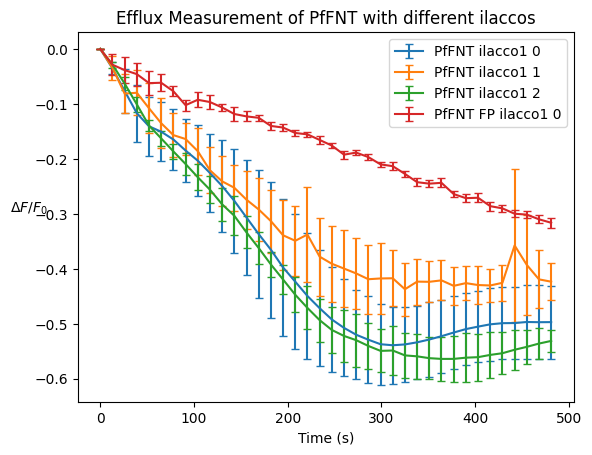

In [4]:
import matplotlib.pyplot as plt

data_frames = [E_PfFNT_ilacco1_0,
               E_PfFNT_ilacco1_1,
               E_PfFNT_ilacco1_2,
               E_PfFNT_FP_ilacco1_0,
               ]
labels = ['PfFNT ilacco1 0',
          'PfFNT ilacco1 1',
          'PfFNT ilacco1 2',
          'PfFNT FP ilacco1 0',]

for df, label in zip(data_frames, labels):
    plt.errorbar(df['Time'], df['Mittelwerte'], yerr=df['Standardabweichung'], label=label, capsize=3)
plt.xlabel('Time (s)')
plt.ylabel(r"$\Delta F/F_0$", rotation = 0)
plt.title('Efflux Measurement of PfFNT with different ilaccos')
plt.legend()
plt.show()

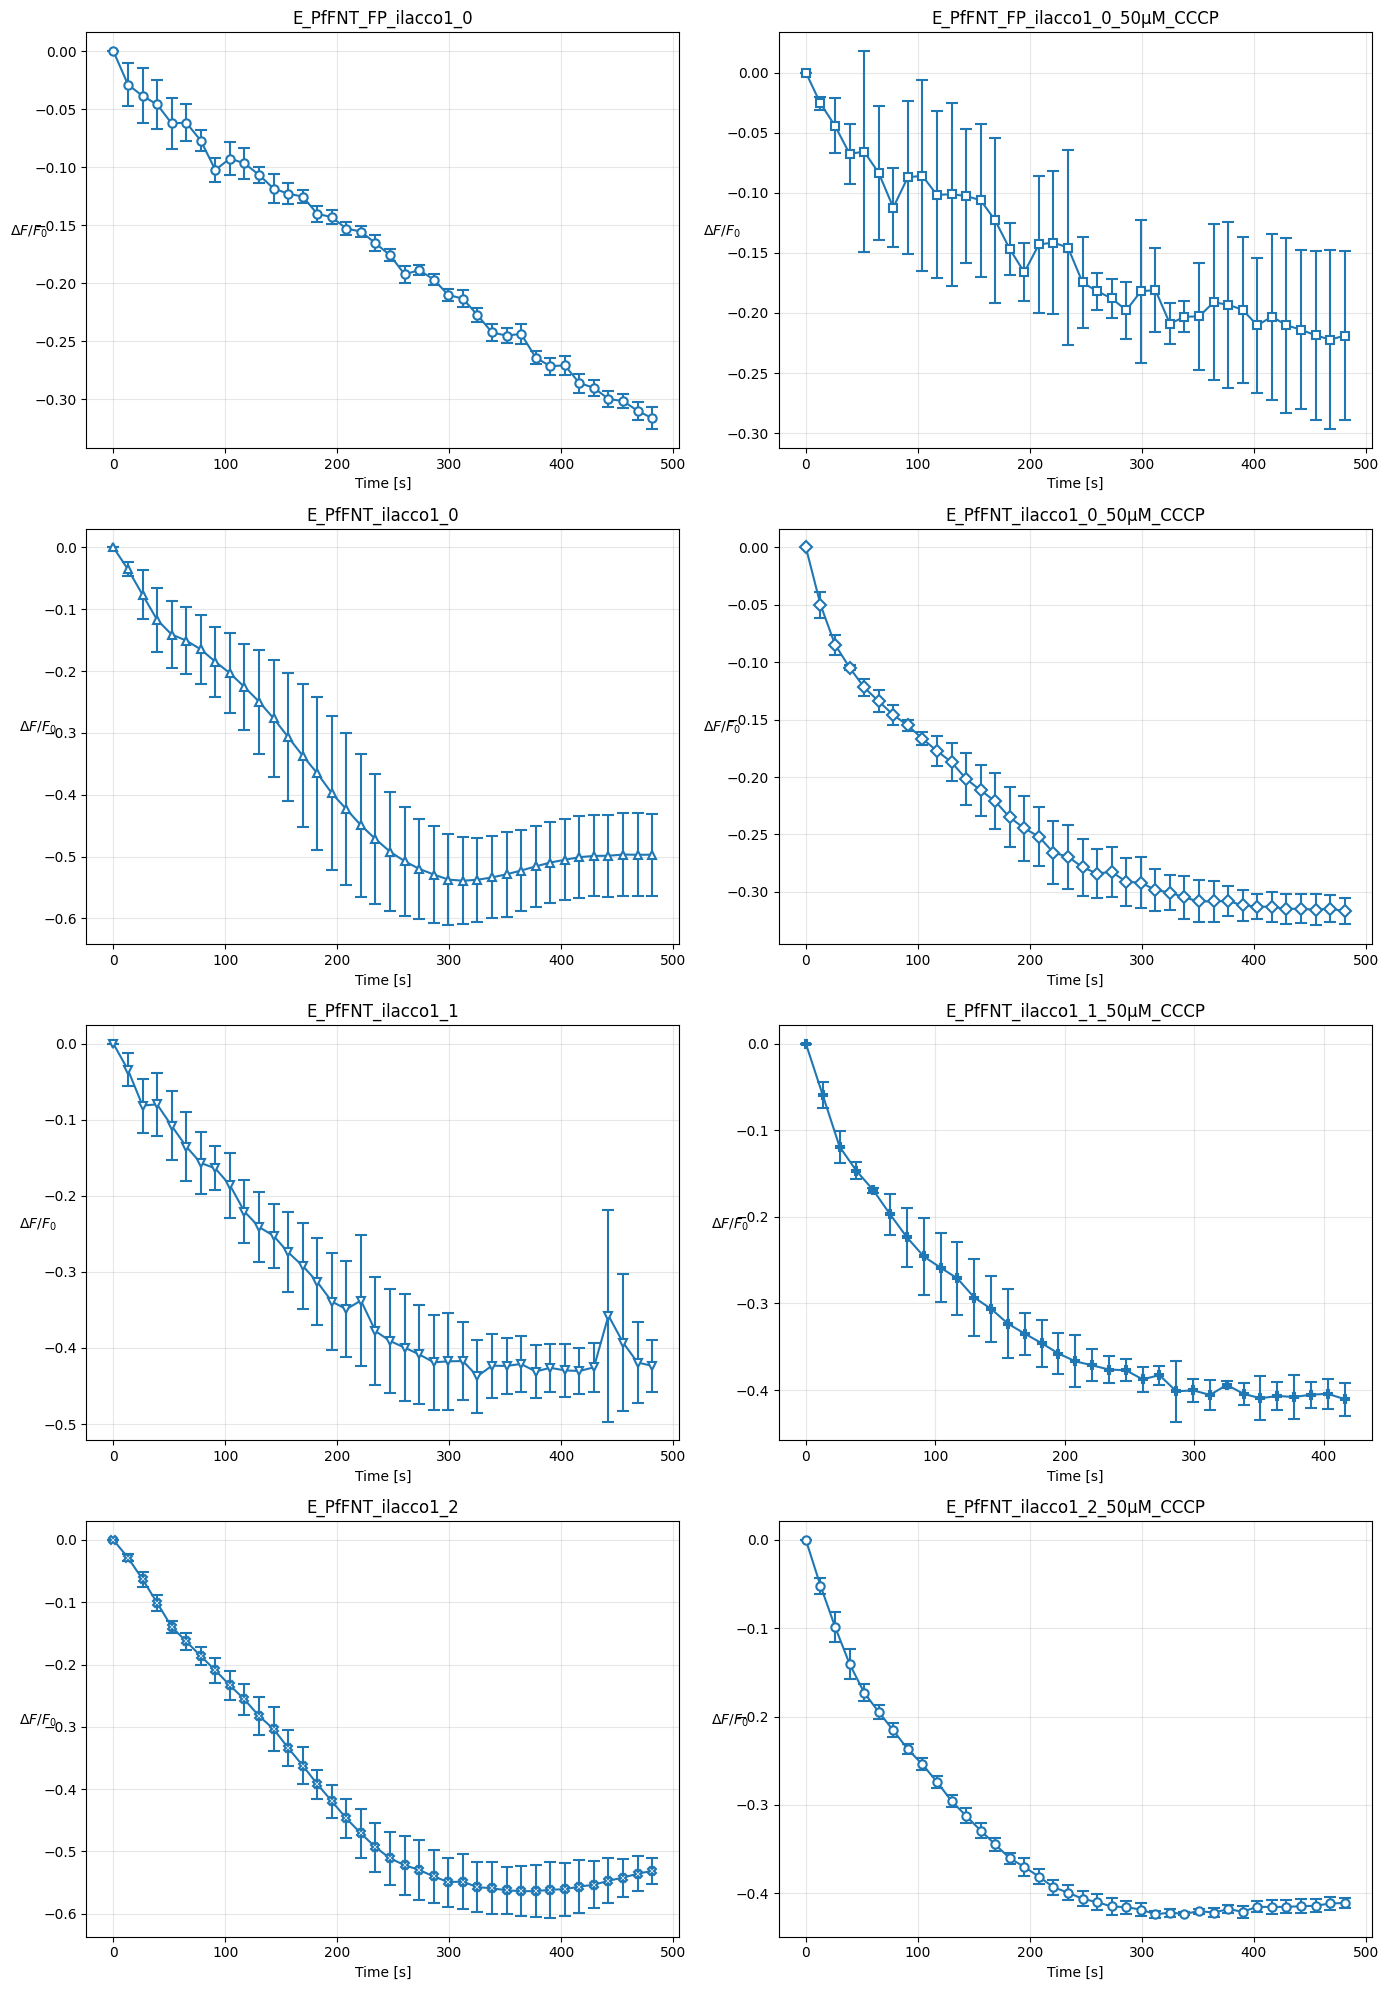

Saved combined Efflux subplot: ../figueres/Efflux_all_subplots.png
Saved combined Efflux subplot: ../figueres/Efflux_all_subplots.png


In [5]:
# Erstelle Subplots für alle `E_MCT1_ilacco1_*` DataFrames (verwende feste Spalten: 'Time','Mittelwerte','Standartabweichung')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sammle automatisch alle DataFrames, die mit dem Prefix beginnen
frames = []
for name in sorted(globals()):
    if name.startswith('E_PfFNT_'):
        frames.append((name, globals().get(name)))

if len(frames) == 0:
    print('Keine DataFrames mit Prefix "E_BSG_MCT1_ilacco1_" gefunden.')
os.makedirs(os.path.join('..', 'figueres'), exist_ok=True)

# Verschiedene Marker für jede Kurve
markers = ['o', 's', '^', 'D', 'v', 'P', 'X']

# Bestimme Grid-Größe
n = len(frames)
cols = 2
rows = (n + cols - 1) // cols if n>0 else 1
fig, axes = plt.subplots(rows, cols, figsize=(14, 5*rows))
if isinstance(axes, np.ndarray):
    axes = axes.flatten()
else:
    axes = [axes]

for ax in axes[n:]:
    ax.axis('off')

for i, ((name, df), ax) in enumerate(zip(frames, axes)):
    ax.clear()
    if df is None:
        ax.text(0.5, 0.5, f"{name} not found", ha='center', va='center')
        ax.set_title(name)
        continue

    # Erwartete Spalten: 'Time', 'Mittelwerte'
    if 'Time' not in df.columns or 'Mittelwerte' not in df.columns:
        ax.text(0.5, 0.5, "Erwartete Spalten 'Time' oder 'Mittelwerte' fehlen", ha='center', va='center')
        ax.set_title(name)
        print(f"{name}: Fehlende Spalten. Vorhandene Spalten: {df.columns.tolist()}")
        continue

    times = pd.to_numeric(df['Time'], errors='coerce')
    means = pd.to_numeric(df['Mittelwerte'], errors='coerce')

    # Std-Spalte: bevorzugt 'Standartabweichung', fallback auf 'Standardabweichung'
    if 'Standartabweichung' in df.columns:
        stds = pd.to_numeric(df['Standartabweichung'], errors='coerce')
    elif 'Standardabweichung' in df.columns:
        stds = pd.to_numeric(df['Standardabweichung'], errors='coerce')
    else:
        stds = np.zeros_like(means)

    mask = (~times.isna()) & (~means.isna())
    if mask.sum() == 0:
        ax.text(0.5, 0.5, 'Keine gültigen Daten zum Plotten', ha='center', va='center')
    marker = markers[i % len(markers)]
    ax.errorbar(times[mask], means[mask], yerr=stds[mask], 
                marker=marker, linestyle='-', capsize=4,
                markerfacecolor='white', markeredgewidth=1.5, markersize=6)
    ax.set_title(name)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(r'$\Delta F/F_0$', rotation = 0)
    ax.grid(alpha=0.3)

plt.tight_layout()
outpath = os.path.join('..', 'figueres', 'Efflux_all_subplots.png')

plt.savefig(outpath, dpi=300, bbox_inches='tight')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
plt.show()

print(f'Saved combined Efflux subplot: {outpath}')
print(f'Saved combined Efflux subplot: {outpath}')
plt.show() 

Saved combined plot: ../figueres/PfFNT_Efflux_combined_comparison.png


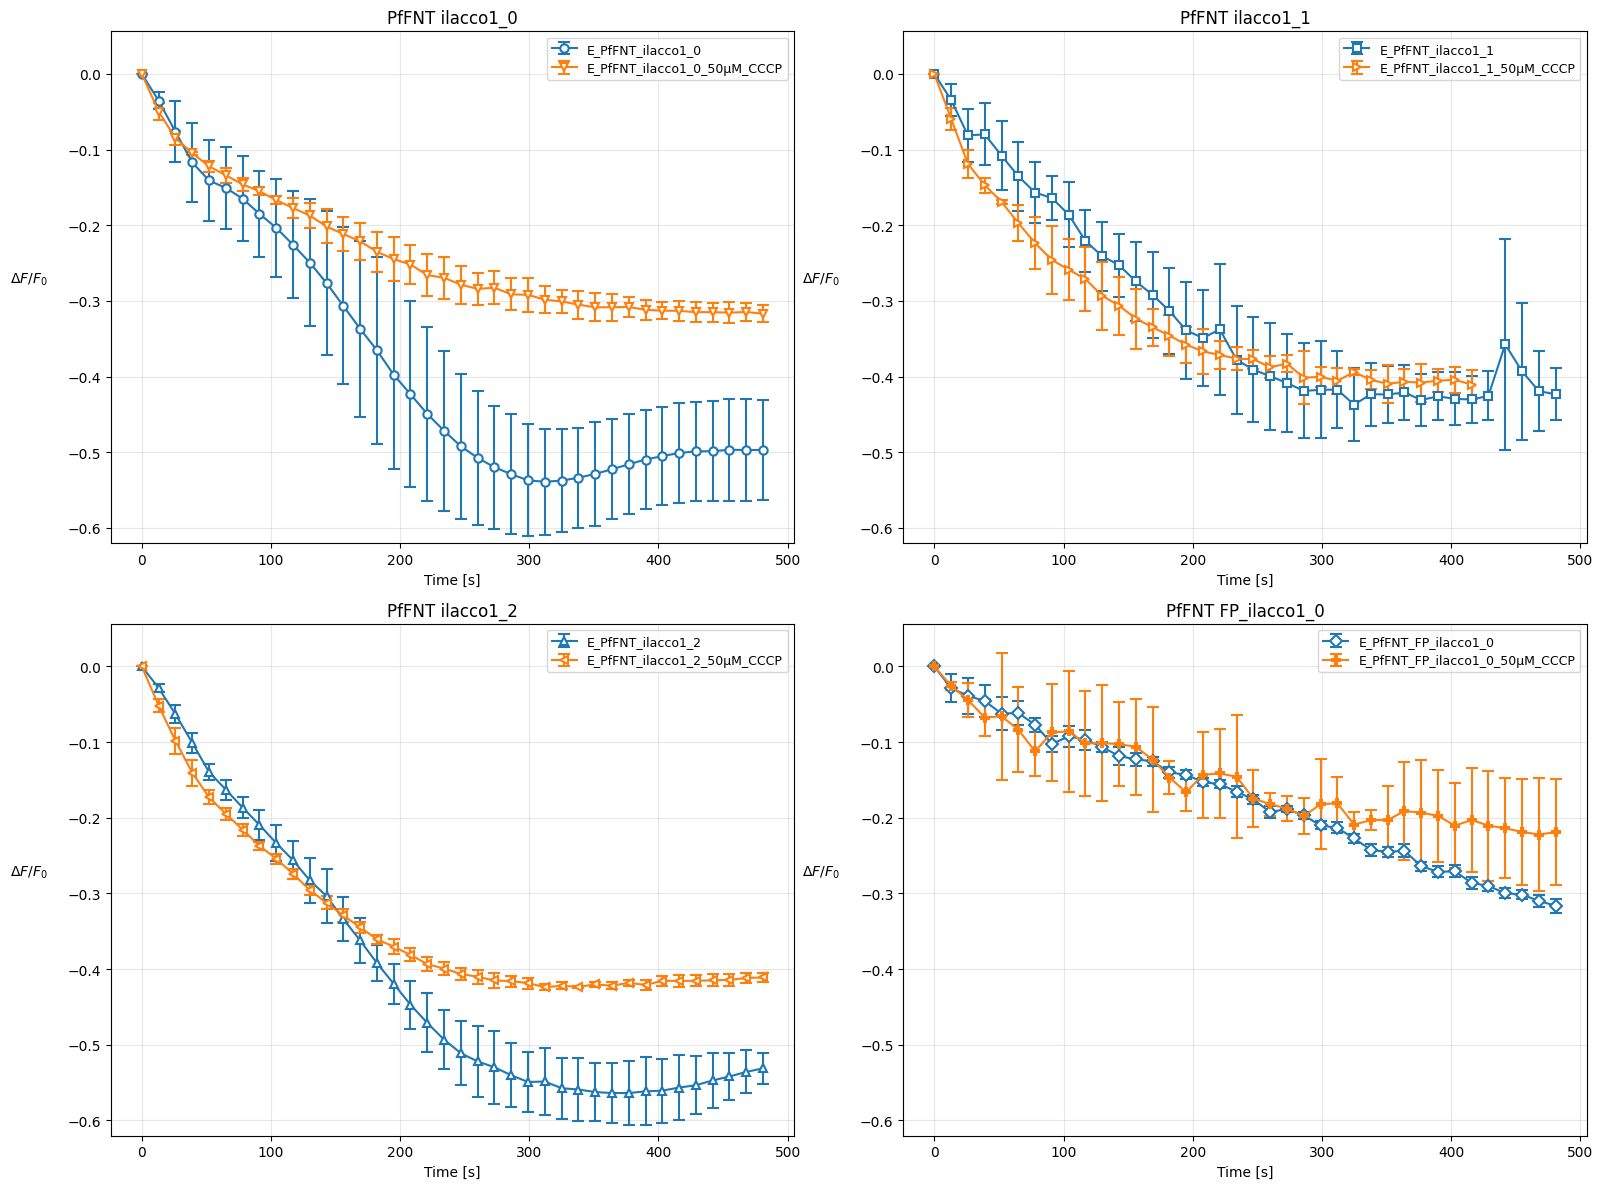

In [6]:
# Kombiniere Plots aus derselben Zeile in 4 Subplots (2x2 Raster)
# Jeder Subplot enthält beide Plots aus einer Zeile (ohne CCCP und mit CCCP)
import matplotlib.pyplot as plt

# Gruppiere DataFrames nach Zeilen (ohne CCCP und mit CCCP)
plot_groups = [
    [('E_PfFNT_ilacco1_0', 'o', E_PfFNT_ilacco1_0),
     ('E_PfFNT_ilacco1_0_50μM_CCCP', 'v', E_PfFNT_ilacco1_0_50μM_CCCP)],
    
    [('E_PfFNT_ilacco1_1', 's', E_PfFNT_ilacco1_1),
     ('E_PfFNT_ilacco1_1_50μM_CCCP', '>', E_PfFNT_ilacco1_1_50μM_CCCP)],
    
    [('E_PfFNT_ilacco1_2', '^', E_PfFNT_ilacco1_2),
     ('E_PfFNT_ilacco1_2_50μM_CCCP', '<', E_PfFNT_ilacco1_2_50μM_CCCP)],
    
    [('E_PfFNT_FP_ilacco1_0', 'D', E_PfFNT_FP_ilacco1_0),
     ('E_PfFNT_FP_ilacco1_0_50μM_CCCP', 'P', E_PfFNT_FP_ilacco1_0_50μM_CCCP)]
]

# Erstelle 2x2 Subplot-Grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Sammle alle Daten für uniforme Skalierung
all_times = []
all_values = []

for idx, group in enumerate(plot_groups):
    ax = axes[idx]
    
    for name, marker, df in group:
        times = df["Time"]
        means = df["Mittelwerte"]
        stds = df["Standardabweichung"]
        
        # Sammle Werte für Skalierung
        all_times.extend(times.values)
        all_values.extend(means.values)
        
        ax.errorbar(times, means, yerr=stds, 
                   marker=marker, linestyle='-', label=name, capsize=4, 
                   markerfacecolor='white', markeredgewidth=1.5, markersize=6)
    
    # Titel basierend auf der Gruppe (entferne CCCP-Suffix für klareren Titel)
    base_name = group[0][0].replace('E_PfFNT_', '')
    ax.set_title(f'PfFNT {base_name}')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=20)
    ax.yaxis.set_label_coords(-0.12, 0.5)
    ax.grid(alpha=0.3)
    ax.legend(loc='best', fontsize=9)

# Berechne und setze uniforme Achsenskalierung
if all_times and all_values:
    x_min, x_max = min(all_times), max(all_times)
    y_min, y_max = min(all_values), max(all_values)
    x_margin = (x_max - x_min) * 0.05
    y_margin = (y_max - y_min) * 0.1
    
    for ax in axes:
        ax.set_xlim(x_min - x_margin, x_max + x_margin)
        ax.set_ylim(y_min - y_margin, y_max + y_margin)

plt.tight_layout()
outpath = os.path.join('..', 'figueres', 'PfFNT_Efflux_combined_comparison.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved combined plot: {outpath}')
plt.show()

Saved individual fits: ../figueres/PfFNT_Efflux_individual_fits.png


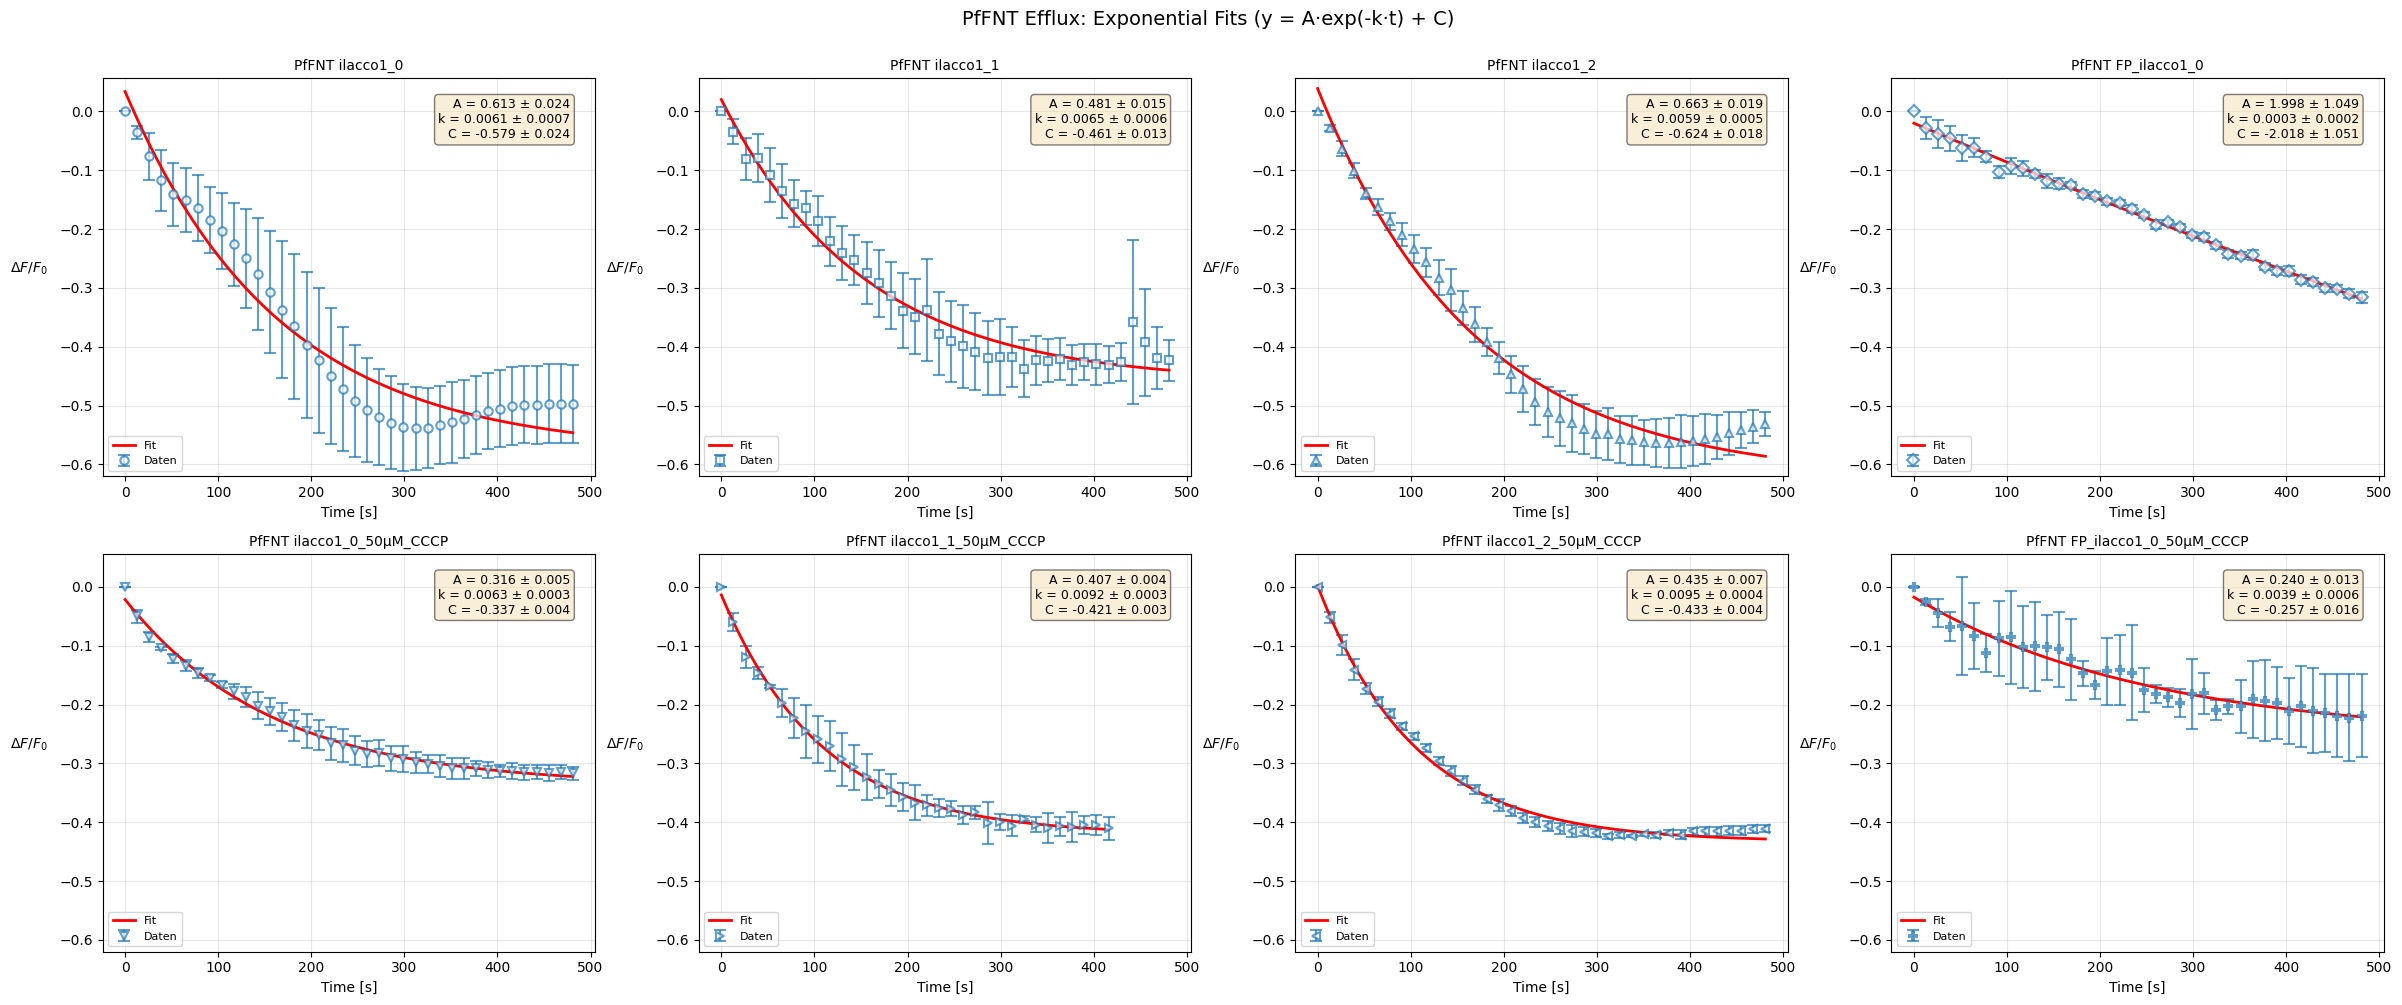

In [7]:
# Exponentieller Fit für alle PfFNT Efflux DataFrames
# Fit-Funktion: y = A*exp(-k*t) + C
from scipy.optimize import curve_fit

def exp_decay(t, A, k, C):
    """Exponentielle Zerfallsfunktion: y = A*exp(-k*t) + C"""
    return A * np.exp(-k * t) + C

# Liste aller DataFrames mit ihren Namen und Markern
data_frames = [
    ('E_PfFNT_ilacco1_0', 'o', E_PfFNT_ilacco1_0),
    ('E_PfFNT_ilacco1_1', 's', E_PfFNT_ilacco1_1),
    ('E_PfFNT_ilacco1_2', '^', E_PfFNT_ilacco1_2),
    ('E_PfFNT_FP_ilacco1_0', 'D', E_PfFNT_FP_ilacco1_0),
    ('E_PfFNT_ilacco1_0_50μM_CCCP', 'v', E_PfFNT_ilacco1_0_50μM_CCCP),
    ('E_PfFNT_ilacco1_1_50μM_CCCP', '>', E_PfFNT_ilacco1_1_50μM_CCCP),
    ('E_PfFNT_ilacco1_2_50μM_CCCP', '<', E_PfFNT_ilacco1_2_50μM_CCCP),
    ('E_PfFNT_FP_ilacco1_0_50μM_CCCP', 'P', E_PfFNT_FP_ilacco1_0_50μM_CCCP)
]

# Erstelle 2x4 Subplot-Grid für individuelle Fits
fig, axes = plt.subplots(2, 4, figsize=(24, 10))
axes = axes.flatten()

# Sammle alle Daten für uniforme Skalierung
all_times = []
all_values = []

for idx, (name, marker, df) in enumerate(data_frames):
    ax = axes[idx]
    
    # Extrahiere Daten
    times = df['Time'].values
    means = df['Mittelwerte'].values
    stds = df['Standardabweichung'].values
    
    # Entferne NaN-Werte
    mask = ~(np.isnan(times) | np.isnan(means))
    times_clean = times[mask]
    means_clean = means[mask]
    stds_clean = stds[mask]
    
    # Sammle für Skalierung
    all_times.extend(times_clean)
    all_values.extend(means_clean)
    
    # Plotte Originaldaten
    ax.errorbar(times_clean, means_clean, yerr=stds_clean,
                marker=marker, linestyle='', capsize=4,
                markerfacecolor='white', markeredgewidth=1.5, markersize=6,
                label='Daten', alpha=0.7)
    
    # Schätze initiale Parameter für den Fit
    A_guess = means_clean[0] - means_clean[-1] if len(means_clean) > 0 else 1.0
    C_guess = means_clean[-1] if len(means_clean) > 0 else 0.0
    k_guess = 0.01
    
    try:
        # Führe exponentiellen Fit durch
        popt, pcov = curve_fit(exp_decay, times_clean, means_clean,
                              p0=[A_guess, k_guess, C_guess],
                              maxfev=10000)
        
        A_fit, k_fit, C_fit = popt
        
        # Berechne Unsicherheiten aus der Kovarianzmatrix
        A_err = np.sqrt(pcov[0, 0])
        k_err = np.sqrt(pcov[1, 1])
        C_err = np.sqrt(pcov[2, 2])
        
        # Erstelle Fit-Kurve
        t_fit = np.linspace(times_clean.min(), times_clean.max(), 200)
        y_fit = exp_decay(t_fit, A_fit, k_fit, C_fit)
        
        # Plotte Fit
        ax.plot(t_fit, y_fit, 'r-', linewidth=2, label='Fit')
        
        # Füge Fit-Parameter als Textbox hinzu
        textstr = f'A = {A_fit:.3f} ± {A_err:.3f}\nk = {k_fit:.4f} ± {k_err:.4f}\nC = {C_fit:.3f} ± {C_err:.3f}'
        ax.text(0.95, 0.95, textstr, transform=ax.transAxes,
                fontsize=9, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
    except Exception as e:
        ax.text(0.5, 0.5, f'Fit fehlgeschlagen:\n{str(e)}',
                transform=ax.transAxes, ha='center', va='center',
                fontsize=8, color='red')
    
    # Formatierung
    ax.set_title(name.replace('E_PfFNT_', 'PfFNT '), fontsize=10)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=20)
    ax.yaxis.set_label_coords(-0.15, 0.5)
    ax.grid(alpha=0.3)
    ax.legend(loc='best', fontsize=8)

# Setze uniforme Achsenskalierung für alle Subplots
if all_times and all_values:
    x_min, x_max = min(all_times), max(all_times)
    y_min, y_max = min(all_values), max(all_values)
    x_margin = (x_max - x_min) * 0.05
    y_margin = (y_max - y_min) * 0.1
    
    for ax in axes:
        ax.set_xlim(x_min - x_margin, x_max + x_margin)
        ax.set_ylim(y_min - y_margin, y_max + y_margin)

plt.suptitle('PfFNT Efflux: Exponential Fits (y = A·exp(-k·t) + C)', fontsize=14, y=1.00)
plt.tight_layout()

# Speichern
outpath = os.path.join('..', 'figueres', 'PfFNT_Efflux_individual_fits.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved individual fits: {outpath}')
plt.show()

Saved parameter comparison: ../figueres/PfFNT_Efflux_parameter_comparison.png


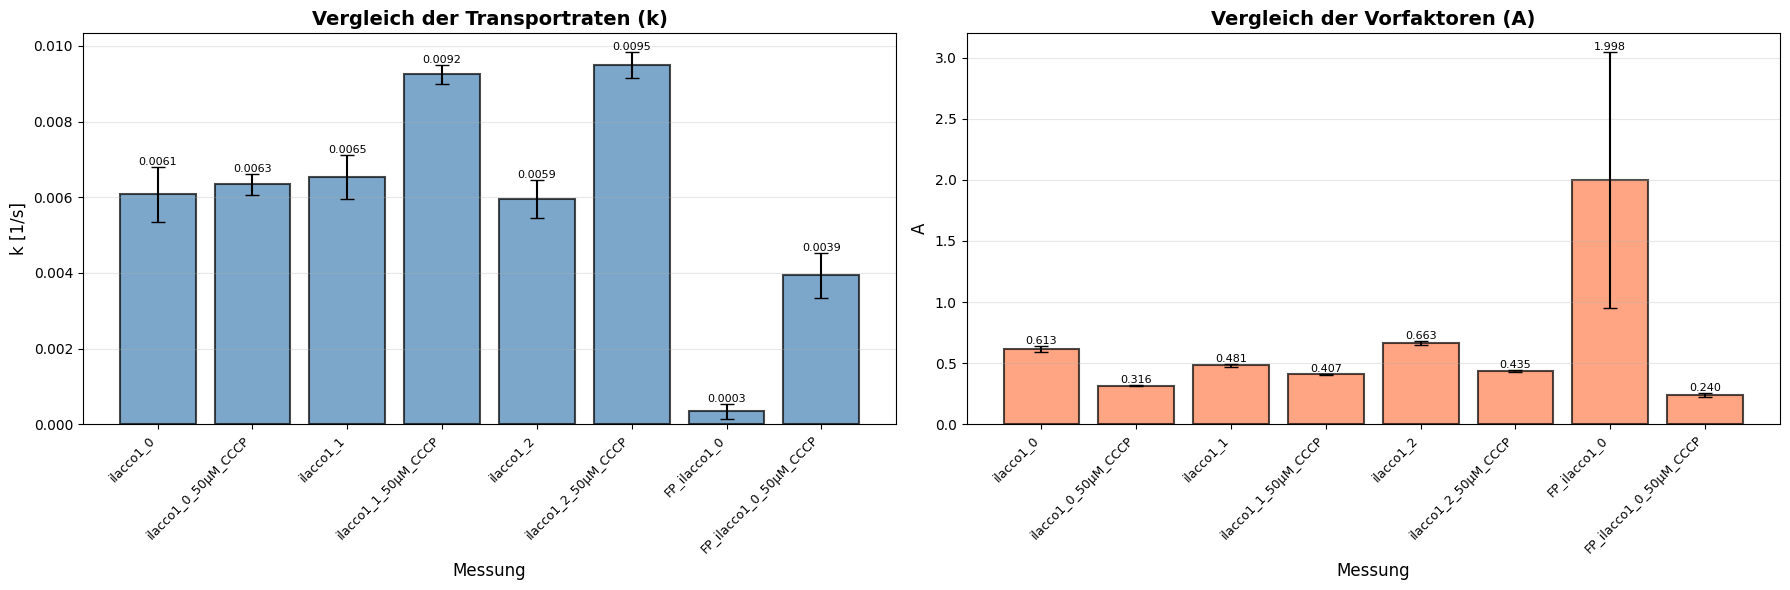


=== Fit-Parameter Zusammenfassung ===
Messung                             k [1/s]         A              
-----------------------------------------------------------------
ilacco1_0                           0.0061±0.0007   0.613±0.024
ilacco1_0_50μM_CCCP                 0.0063±0.0003   0.316±0.005
ilacco1_1                           0.0065±0.0006   0.481±0.015
ilacco1_1_50μM_CCCP                 0.0092±0.0003   0.407±0.004
ilacco1_2                           0.0059±0.0005   0.663±0.019
ilacco1_2_50μM_CCCP                 0.0095±0.0004   0.435±0.007
FP_ilacco1_0                        0.0003±0.0002   1.998±1.049
FP_ilacco1_0_50μM_CCCP              0.0039±0.0006   0.240±0.013


In [8]:
# Histogramme für Fit-Parameter: k (Transportrate) und A (Vorfaktor)
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exp_decay(t, A, k, C):
    """Exponentielle Zerfallsfunktion: y = A*exp(-k*t) + C"""
    return A * np.exp(-k * t) + C

data_frames = [
    ('E_PfFNT_ilacco1_0', 'o', E_PfFNT_ilacco1_0),
    ('E_PfFNT_ilacco1_0_50μM_CCCP', 'v', E_PfFNT_ilacco1_0_50μM_CCCP),
    ('E_PfFNT_ilacco1_1', 's', E_PfFNT_ilacco1_1),
    ('E_PfFNT_ilacco1_1_50μM_CCCP', '>', E_PfFNT_ilacco1_1_50μM_CCCP),
    ('E_PfFNT_ilacco1_2', '^', E_PfFNT_ilacco1_2),
    ('E_PfFNT_ilacco1_2_50μM_CCCP', '<', E_PfFNT_ilacco1_2_50μM_CCCP),
    ('E_PfFNT_FP_ilacco1_0', 'D', E_PfFNT_FP_ilacco1_0),
    ('E_PfFNT_FP_ilacco1_0_50μM_CCCP', 'P', E_PfFNT_FP_ilacco1_0_50μM_CCCP)
]

# Listen für Parameter und Unsicherheiten
names = []
k_values = []
k_errors = []
A_values = []
A_errors = []

# Führe Fits durch und sammle Parameter
for name, marker, df in data_frames:
    times = df["Time"].values
    means = df["Mittelwerte"].values
    
    # Entferne NaN-Werte
    mask = ~(np.isnan(times) | np.isnan(means))
    times_clean = times[mask]
    means_clean = means[mask]
    
    try:
        # Startparameter schätzen
        A_guess = means_clean[0] - means_clean[-1]
        C_guess = means_clean[-1]
        k_guess = 0.01
        
        popt, pcov = curve_fit(exp_decay, times_clean, means_clean, 
                              p0=[A_guess, k_guess, C_guess],
                              maxfev=10000)
        
        A_fit, k_fit, C_fit = popt
        
        # Berechne Unsicherheiten
        A_err = np.sqrt(pcov[0,0])
        k_err = np.sqrt(pcov[1,1])
        
        # Speichere Werte
        names.append(name.replace('E_PfFNT_', ''))
        k_values.append(k_fit)
        k_errors.append(k_err)
        A_values.append(A_fit)
        A_errors.append(A_err)
        
    except Exception as e:
        print(f'Fit für {name} fehlgeschlagen: {e}')

# Erstelle zwei Histogramme nebeneinander
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Histogramm 1: Transportrate k
x_pos = np.arange(len(names))
bars1 = ax1.bar(x_pos, k_values, yerr=k_errors, capsize=5, 
                color='steelblue', edgecolor='black', linewidth=1.5, alpha=0.7)
ax1.set_xlabel('Messung', fontsize=12)
ax1.set_ylabel('k [1/s]', fontsize=12)
ax1.set_title('Vergleich der Transportraten (k)', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(names, rotation=45, ha='right', fontsize=9)
ax1.grid(axis='y', alpha=0.3)

# Füge Werte über den Balken hinzu
for i, (bar, k_val, k_err) in enumerate(zip(bars1, k_values, k_errors)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + k_err,
            f'{k_val:.4f}', ha='center', va='bottom', fontsize=8)

# Histogramm 2: Vorfaktor A
bars2 = ax2.bar(x_pos, A_values, yerr=A_errors, capsize=5,
                color='coral', edgecolor='black', linewidth=1.5, alpha=0.7)
ax2.set_xlabel('Messung', fontsize=12)
ax2.set_ylabel('A', fontsize=12)
ax2.set_title('Vergleich der Vorfaktoren (A)', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(names, rotation=45, ha='right', fontsize=9)
ax2.grid(axis='y', alpha=0.3)

# Füge Werte über den Balken hinzu
for i, (bar, A_val, A_err) in enumerate(zip(bars2, A_values, A_errors)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + A_err,
            f'{A_val:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()

outpath = os.path.join('..', 'figueres', 'PfFNT_Efflux_parameter_comparison.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved parameter comparison: {outpath}')
plt.show()

# Drucke Zusammenfassung
print('\n=== Fit-Parameter Zusammenfassung ===')
print(f'{"Messung":<35} {"k [1/s]":<15} {"A":<15}')
print('-' * 65)
for name, k, k_e, A, A_e in zip(names, k_values, k_errors, A_values, A_errors):
    print(f'{name:<35} {k:.4f}±{k_e:.4f}   {A:.3f}±{A_e:.3f}')